Accuracy: 0.8823
Confusion Matrix:
[[684  48]
 [ 49  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       732
           1       0.47      0.47      0.47        92

    accuracy                           0.88       824
   macro avg       0.70      0.70      0.70       824
weighted avg       0.88      0.88      0.88       824



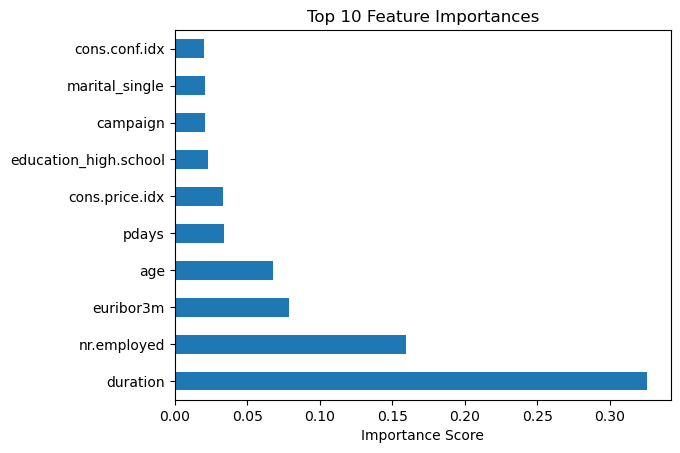

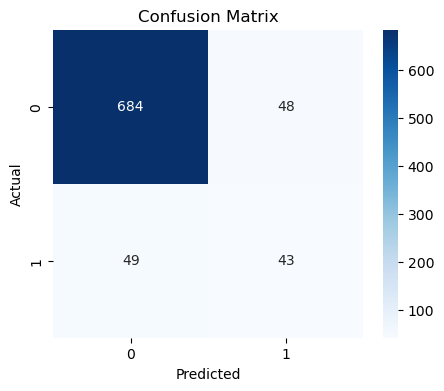

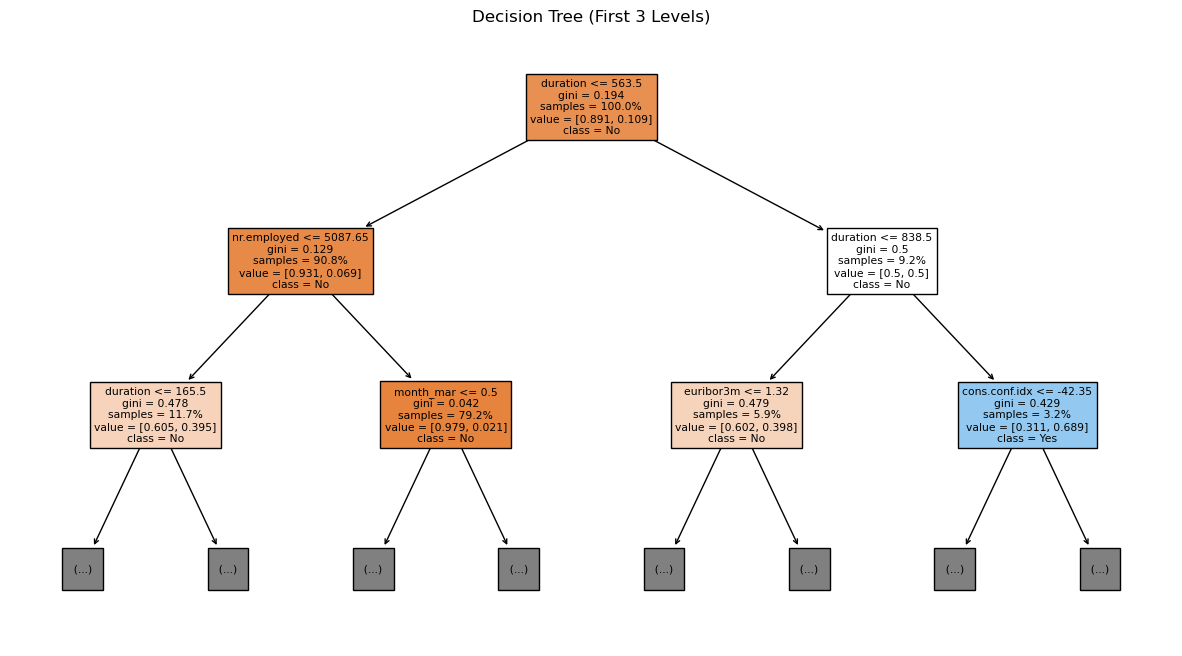

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('bank-additional.csv', sep=';')

# Preprocessing: Encode categorical variables using get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize Feature Importances
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.show()

# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize Part of the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(clf, filled=True, proportion=True, max_depth=2, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree (First 3 Levels)")
plt.show()
